<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: Data Scientist в Segmento Екатерина Демидова

# <center>Домашнее задание 2. <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

In [33]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся данные из нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://inclass.kaggle.com/c/howpop-habrahabr-favs-lognorm). Файл **`howpop_train.csv`** уже лежит в нашем репозитории в каталоге **`data`**, но его можно скачать и с Kaggle.

In [34]:
df = pd.read_csv('../../data/howpop_train.csv')

In [35]:
df.shape

(134137, 17)

In [36]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [37]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [39]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/yota/blog/254223/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [40]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [41]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [42]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]




df['day'] = [d.day for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

In [43]:
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,day
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18,1
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18,1
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18,1
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1,2
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14,2
5,https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,1,192,9.0,2.0,2008,1,3,16,2
6,https://geektimes.ru/post/18306/,geektimes.ru,18306,2008-01-03 12:55:00,@abbasov,NaN,False,435,Modbook в действии,10,0,301,5.0,1.0,2008,1,4,12,3
7,https://habrahabr.ru/post/18311/,habrahabr.ru,18311,2008-01-03 17:20:00,@Andrey,misc,False,3291,В чем суть проекта Vladelia.ru,64,1,141,17.0,20.0,2008,1,4,17,3
8,https://habrahabr.ru/post/31352/,habrahabr.ru,31352,2008-01-03 22:54:00,@kvladimir,develop,False,1953,Подтверждено: Wikia Search запускается в понед...,23,2,208,21.0,3.0,2008,1,4,22,3
9,https://habrahabr.ru/post/18314/,habrahabr.ru,18314,2008-01-03 23:56:00,@lvea,develop,False,3712,Mobile 2.0 Выбор предпочтительного способа связи,6,1,401,2.0,0.0,2008,1,4,23,3


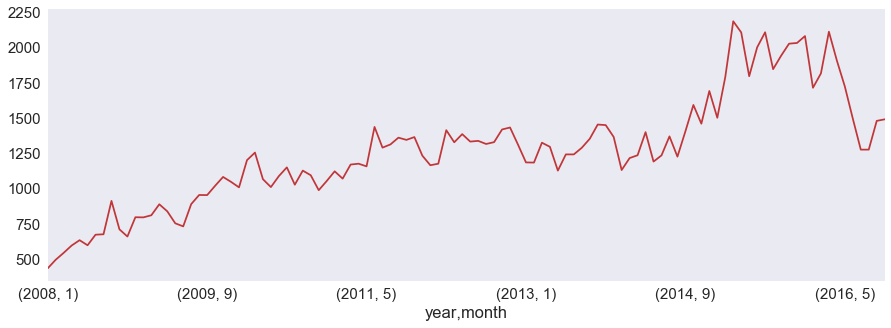

In [44]:
df.groupby(['year','month'])['url'].count().plot()

In [45]:

df.groupby(['year','month'])['url'].count()

year  month
2008  1         435
      2         496
      3         545
      4         597
      5         635
      6         599
      7         674
      8         677
      9         914
      10        712
      11        661
      12        798
2009  1         797
      2         812
      3         890
      4         840
      5         755
      6         733
      7         891
      8         956
      9         955
      10       1021
      11       1084
      12       1049
2010  1        1010
      2        1203
      3        1257
      4        1068
      5        1012
      6        1090
               ... 
2014  5        1193
      6        1237
      7        1372
      8        1228
      9        1408
      10       1595
      11       1462
      12       1694
2015  1        1504
      2        1793
      3        2189
      4        2110
      5        1799
      6        2004
      7        2111
      8        1849
      9        1944
      10       2030
      11

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016,
* март 2015,
* апрель 2015,
* апрель 2016.

In [46]:
#март 2015

## 2\. Проанализируйте публикации в этом месяце (из вопроса 1)

Выберите один или несколько вариантов:

* На графике не заметны какие-либо выбросы или аномалии,
* Один или несколько дней сильно выделяются из общей картины,
* На хабре _всегда_ больше статей, чем на гиктаймсе,
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`

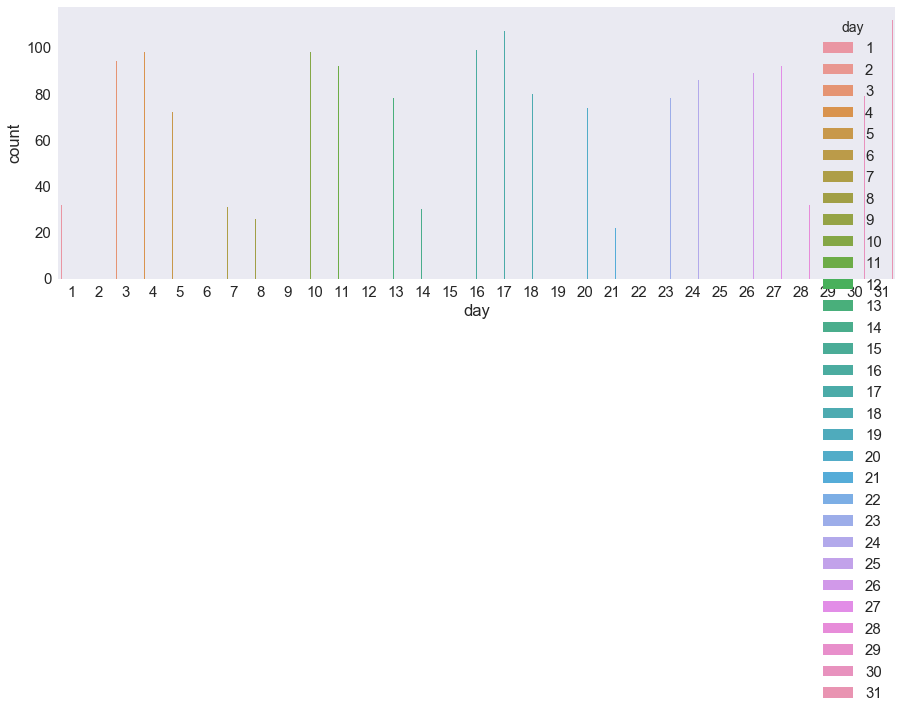

In [47]:
sns.countplot(x='day', hue='day', data=df[(df['year']==2015)&(df['month']==3)]);

In [48]:
df1=df[(df['year']==2015)&(df['month']==3)].copy()

In [49]:
df1.groupby(['dayofweek','domain'])['url'].count()

dayofweek  domain      
1          geektimes.ru    129
           habrahabr.ru    267
2          geektimes.ru    170
           habrahabr.ru    327
3          geektimes.ru    124
           habrahabr.ru    238
4          geektimes.ru    116
           habrahabr.ru    232
5          geektimes.ru    107
           habrahabr.ru    208
6          geektimes.ru     57
           habrahabr.ru     58
7          geektimes.ru     52
           habrahabr.ru    104
Name: url, dtype: int64

In [51]:
df1.groupby(['domain','dayofweek'])['url'].count()

domain        dayofweek
geektimes.ru  1            129
              2            170
              3            124
              4            116
              5            107
              6             57
              7             52
habrahabr.ru  1            267
              2            327
              3            238
              4            232
              5            208
              6             58
              7            104
Name: url, dtype: int64

## 3\. Выберите верное утверждение

* Больше всего просмотров (в среднем) набирают статьи, опубликованные в 12 часов дня;
* У опубликованных в 10 утра постов больше всего комментариев  (в среднем);
* Больше всего просмотров  (в среднем) набирают статьи, опубликованные в 6 часов утра;
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера;
* На хабре дневные статьи комментируют чаще  (в среднем), чем вечерние.

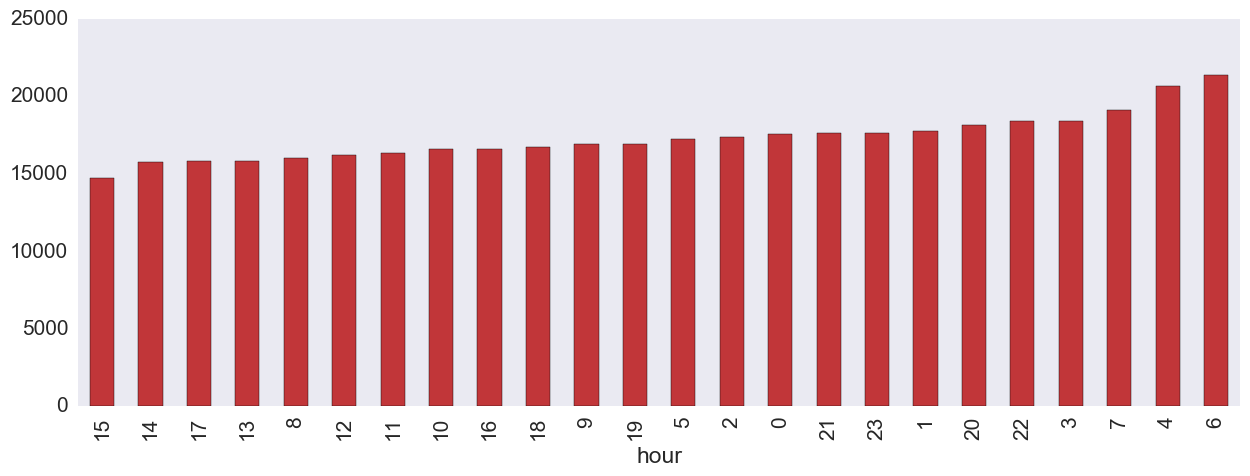

In [63]:
df.groupby(['hour'])['views'].mean().sort_values().plot( kind = 'bar')

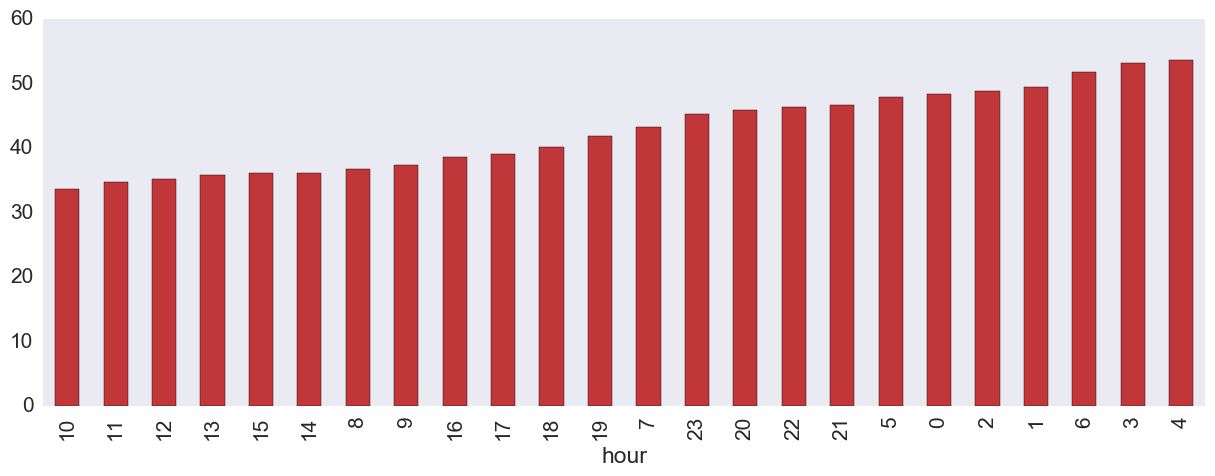

In [64]:
df.groupby(['hour'])['comments'].mean().sort_values().plot( kind = 'bar')

## 4\. Кого из топ-20 авторов (по числу статей) чаще всего минусуют (в среднем)?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [119]:
lst = (df.groupby(['author'])['url'].count().sort_values(ascending=False).head(20).index)


In [120]:
lst

Index(['@alizar', '@marks', '@SLY_G', '@ivansychev', '@semen_grinshtein',
       '@jeston', '@aleksandrit', '@XaocCPS', '@Mithgol', '@Mordatyj',
       '@Shapelez', '@ilya42', '@atomlib', '@ragequit', '@Tylerskald',
       '@andorro', '@jasiejames', '@lozga', '@Sterhel', '@Jeditobe'],
      dtype='object', name='author')

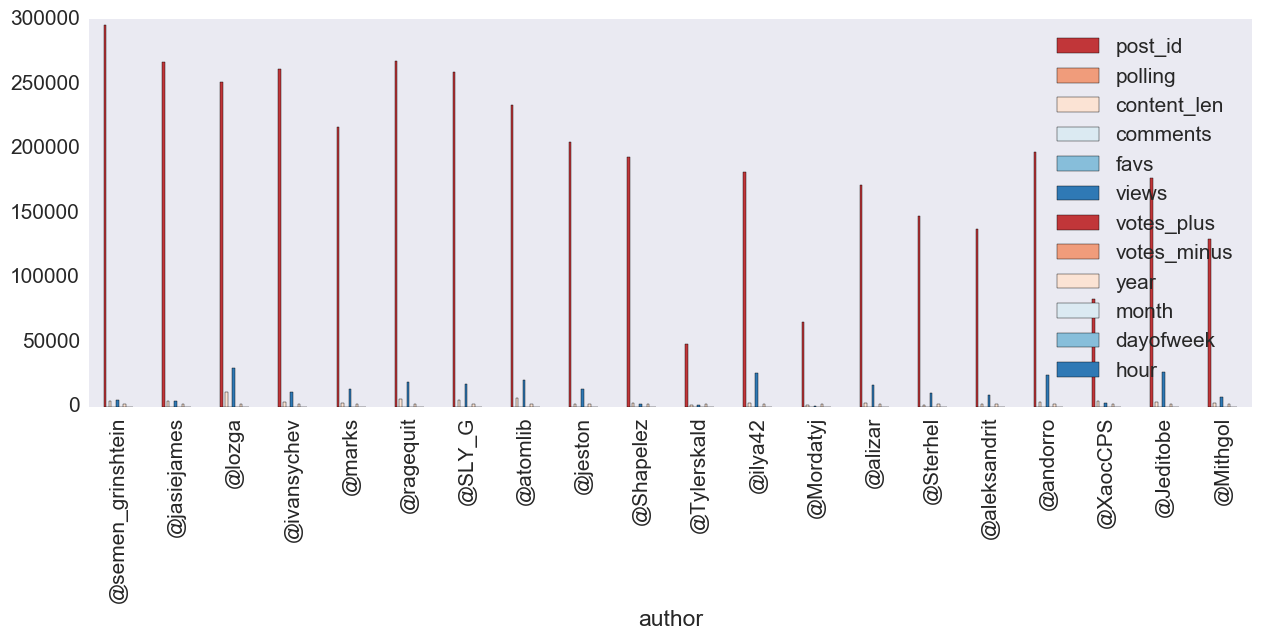

In [131]:
df[df['author'].isin(lst)].groupby(['author']).mean().sort_values('votes_minus').plot(kind = 'bar')

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

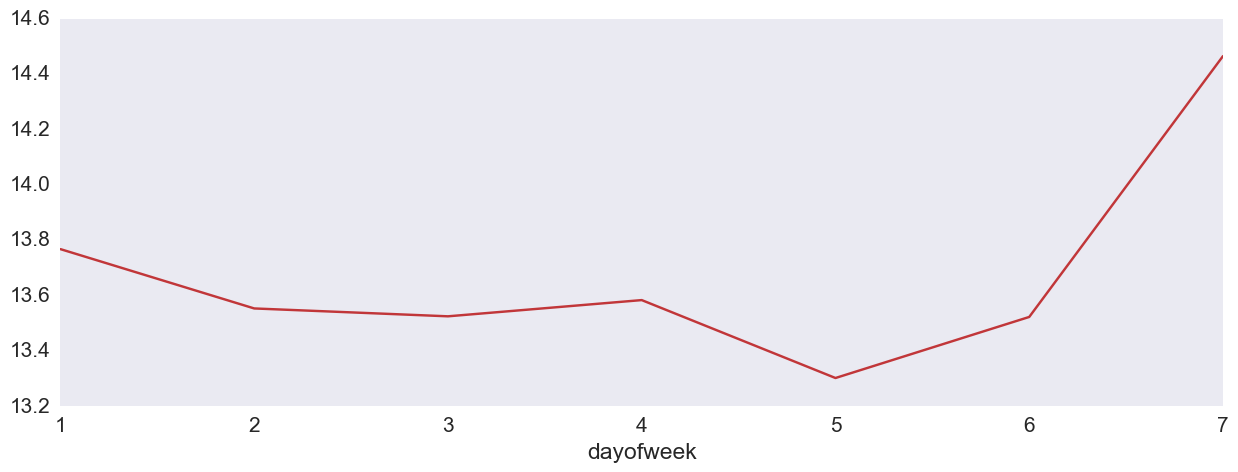

In [134]:
df.groupby(['dayofweek'])['hour'].mean().plot()